# "Me anticipo a las crecidas en nuestros ríos"

# Análisis y Visualización de Datos

In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Carga de datos y previsualización 



CAUDAL LA CRUZ

In [5]:
caudal_LaCruz = pd.read_csv("/content/drive/My Drive/DiploDatos 2020/Presentacion final Mentoria/dataset/Datos_Caudales/RioLaCruz.csv", parse_dates = True, index_col="date_time")

In [6]:
caudal_LaCruz.describe()

,Caudal_m3/s
count,72877.000000
mean,0.702274
std,5.448700
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,182.026000


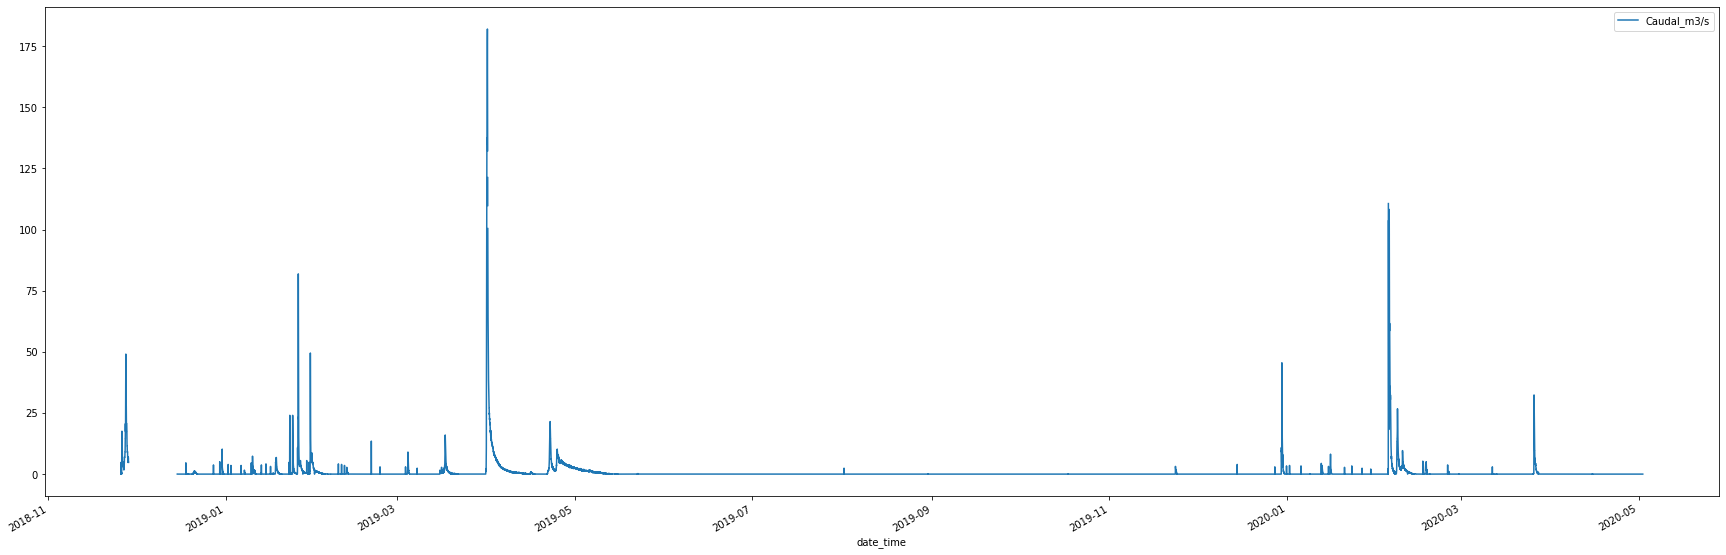

In [7]:
caudal_LaCruz.plot(figsize=(30,10))

CAUDAL SANTA ROSA

In [8]:
caudal_sta_rosa = pd.read_csv("/content/drive/My Drive/DiploDatos 2020/Presentacion final Mentoria/dataset/Datos_Caudales/RioSantaRosa.csv", parse_dates = True, index_col="date_time")
caudal_sta_rosa.columns = ['Caudal_m3/s']
#caudal_sta_rosa.plot(figsize=(30,10))

In [9]:
caudal_sta_rosa.describe()

,Caudal_m3/s
count,71241.000000
mean,3.773254
std,13.992317
min,0.000000
25%,0.000000
50%,0.860872
75%,3.246499
max,1112.134641


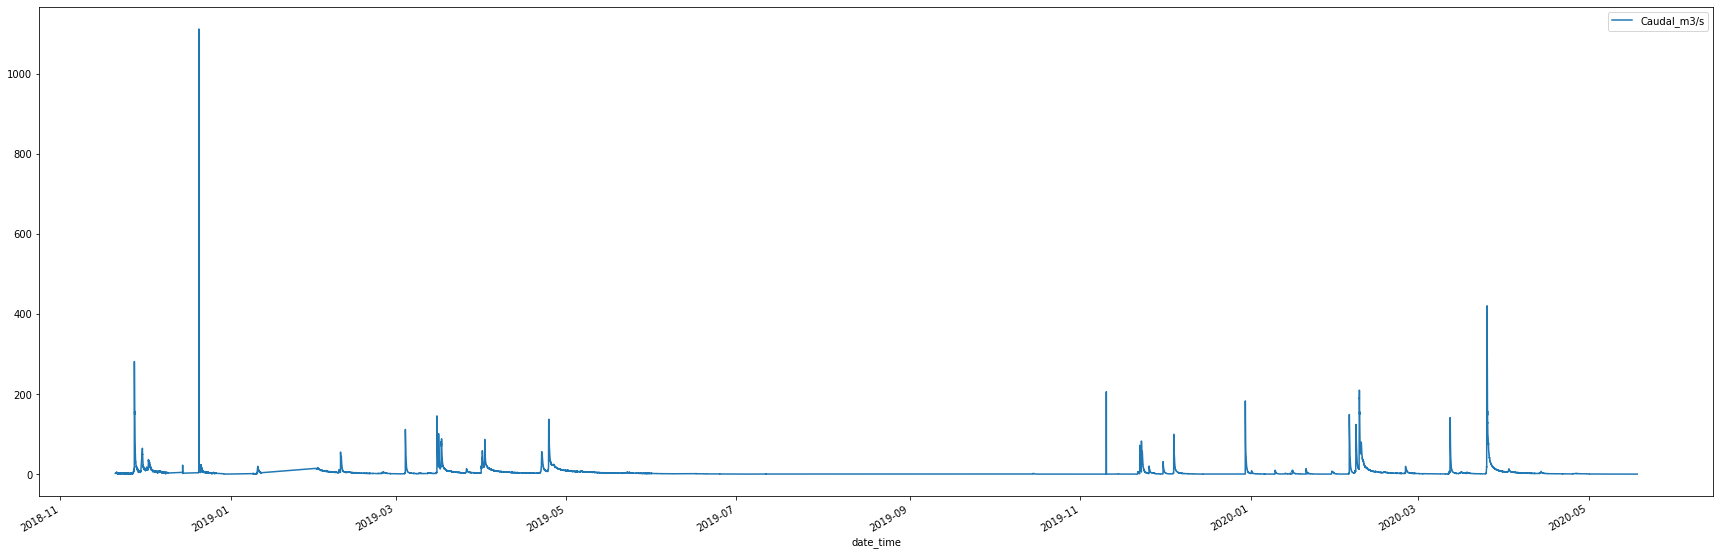

In [10]:
caudal_sta_rosa.plot(figsize=(30,10))

CAUDAL QUILLINZO

In [11]:
caudal_quillinzo = pd.read_csv("/content/drive/My Drive/DiploDatos 2020/Presentacion final Mentoria/dataset/Datos_Caudales/RioQuillinzo.csv", parse_dates = True, index_col="date_time")
caudal_quillinzo.columns = ['Caudal_m3/s']
#caudal_quillinzo.plot(figsize=(30,10))

In [12]:
caudal_quillinzo.describe()

,Caudal_m3/s
count,69778.000000
mean,10.654684
std,26.802502
min,1.488706
25%,3.349818
50%,5.329608
75%,9.219298
max,1378.847189


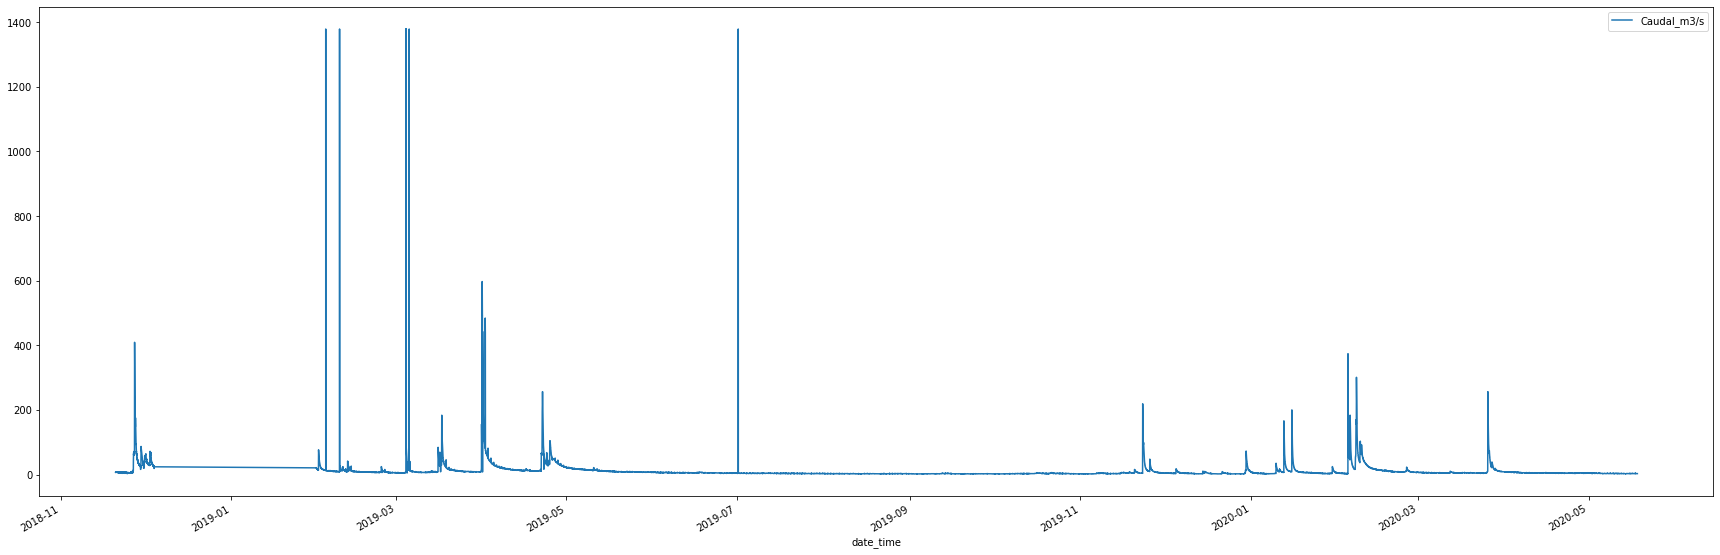

In [13]:
caudal_quillinzo.plot(figsize=(30,10))

CAUDAL EMBALSE

In [14]:
caudal_embalse = pd.read_csv("/content/drive/My Drive/DiploDatos 2020/Presentacion final Mentoria/dataset/Datos_Caudales/Caudal_Embalse.csv", parse_dates=['fecha'])
caudal_embalse = caudal_embalse.drop(['mes','dias_al_mes','anio'],axis=1)
caudal_embalse.columns = ['fecha','Caudal_m3/s']
#caudal_embalse
#caudal_embalse.plot(figsize=(30,10))

DATOS METEOROLÓGICOS APRHI: SANTA ROSA DE CALAMUCHITA

In [15]:
meteo_StaRosa = pd.read_csv("/content/drive/My Drive/DiploDatos 2020/Presentacion final Mentoria/dataset/Datos_Meteorologicos/APRHi - Sta Rosa de Calamuchita.csv", parse_dates=True,index_col='date_time')

DATOS METEOROLÓGICOS APRHI: YACANTO

In [16]:
meteo_Yacanto = pd.read_csv("/content/drive/My Drive/DiploDatos 2020/Presentacion final Mentoria/dataset/Datos_Meteorologicos/APRHi - Yacanto Norte.csv", parse_dates=True,index_col='date')
#meteo_Yacanto

DATOS METEOROLOGICOS APRHI: VILLA DEL DIQUE

In [17]:
meteo_VillaDique = pd.read_csv("/content/drive/My Drive/DiploDatos 2020/Presentacion final Mentoria/dataset/Datos_Meteorologicos/AgriculturaCba - Villa del Dique.csv", parse_dates=True,index_col='date')
#meteo_VillaDique

In [18]:
meteo_LaFlorida = pd.read_csv("https://raw.githubusercontent.com/Rondamon/2020_Mentoria_PronosticoCaudales/master/dataset/Datos_Meteorologicos/BDHI_LaFlorida.csv",parse_dates=['Fecha'])

##  Estadísticos descriptivos

 


 Rango de caudales 

In [19]:
print("Embalse: Caudal Minimo: {}, Caudal Maximo: {}".format(caudal_embalse['Caudal_m3/s'].min(),caudal_embalse['Caudal_m3/s'].max()))
print("Rio Quillinzo: Caudal Minimo: {}, Caudal Maximo: {}".format(caudal_quillinzo['Caudal_m3/s'].min(),caudal_quillinzo['Caudal_m3/s'].max()))
print("Rio Sta Rosa: Caudal Minimo: {}, Caudal Maximo: {}".format(caudal_sta_rosa['Caudal_m3/s'].min(),caudal_sta_rosa['Caudal_m3/s'].max()))

Embalse: Caudal Minimo: 0.84, Caudal Maximo: 227.22
Rio Quillinzo: Caudal Minimo: 1.4887060019999998, Caudal Maximo: 1378.847189
Rio Sta Rosa: Caudal Minimo: 0.0, Caudal Maximo: 1112.134641


Cuantificación de valores faltantes en *caudales*

In [20]:
nulos_embalse = caudal_embalse['Caudal_m3/s'].isna().sum()
nulos_quillinzo = caudal_quillinzo['Caudal_m3/s'].isna().sum()
nulos_sta_rosa = caudal_sta_rosa['Caudal_m3/s'].isna().sum()

print("Cantidad de Registros y de Registros Nulos por archivo:\n{}, {}\n{}, {}\n{}, {}".format(
    caudal_embalse.shape[0],nulos_embalse,caudal_quillinzo.shape[0],nulos_quillinzo,caudal_sta_rosa.shape[0],nulos_sta_rosa))

Cantidad de Registros y de Registros Nulos por archivo:
1260, 0
69778, 0
71246, 5


Grafico de cajas de cada variable en las estaciones meteorológicas "APRHi - Sta  Rosa de Calamuchita", "APRHi - Yacanto Norte" y "AgriculturaCba - Villa del Dique".

In [21]:
meteo_StaRosa.columns

Index(['Codigo', 'Estacion', 'dia', 'mes', 'anio', 'date', 'Hora',
       'BUI_[adim]', 'Temperatura_[Celsius]', 'HumedadRel_[porc]',
       'Presion_[hPa]', 'DireccionViento_[grad]', 'VelocidadViento_[KpH]',
       'RadiacionSolar_[WpM2]', 'Lluvia_[mm]', 'RafagaViento_[KpH]',
       'ISI_[adim]', 'FaseLunarAmanecerOcaso_[adim]',
       'Alertas_Heladas_Agroapp_[adim]', 'Panel_Solar_[adim]',
       'SenialGPRS_[ASU]', 'IndicePeligroIncendios_[adim]', 'FFMC_[adim]',
       'DMC_[adim]', 'DC_[adim]', 'NivelBateria_[V]'],
      dtype='object')

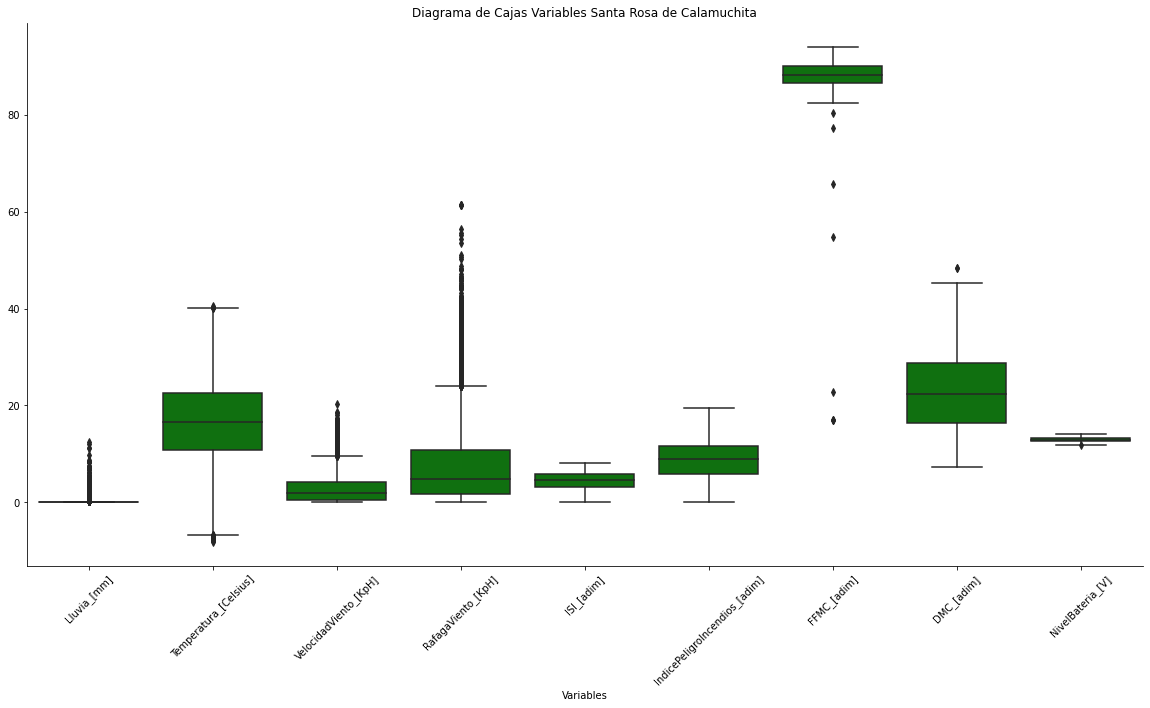

In [22]:
plt.figure(figsize=(20,10))
sns.boxplot(data=meteo_StaRosa[['Lluvia_[mm]', 'Temperatura_[Celsius]','VelocidadViento_[KpH]','RafagaViento_[KpH]','ISI_[adim]','IndicePeligroIncendios_[adim]' 
                                ,'FFMC_[adim]','DMC_[adim]','NivelBateria_[V]']],color='green')
plt.xlabel('Variables')
plt.title('Diagrama de Cajas Variables Santa Rosa de Calamuchita')
plt.xticks(rotation=45)
sns.despine()

In [23]:
meteo_Yacanto.columns

Index(['Codigo', 'Estacion', 'dia', 'mes', 'anio', 'Hora', 'date_time',
       'BUI_[adim]', 'Temperatura_[Celsius]', 'HumedadRel_[porc]',
       'Presion_[hPa]', 'DireccionViento_[grad]', 'VelocidadViento_[KpH]',
       'RadiacionSolar_[WpM2]', 'Lluvia_[mm]', 'RafagaViento_[KpH]',
       'ISI_[adim]', 'FaseLunarAmanecerOcaso_[adim]',
       'Alertas_Heladas_Agroapp_[adim]', 'Panel_Solar_[adim]',
       'SenialGPRS_[ASU]', 'IndicePeligroIncendios_[adim]', 'FFMC_[adim]',
       'DMC_[adim]', 'DC_[adim]', 'NivelBateria_[V]'],
      dtype='object')

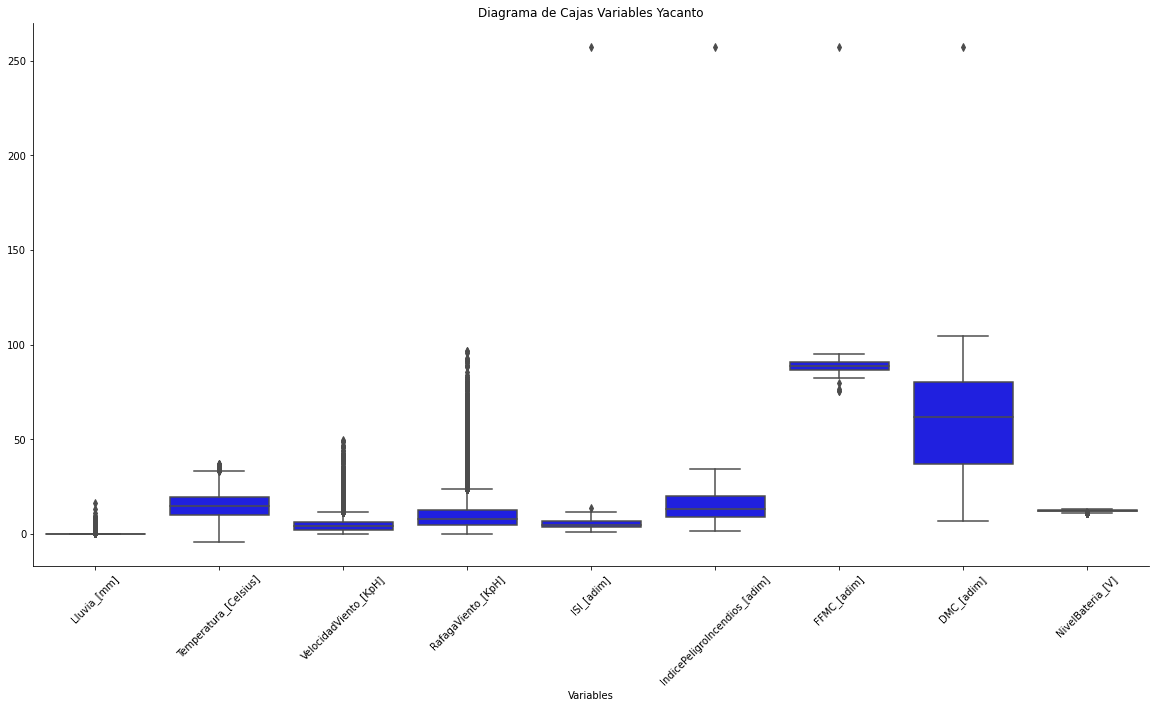

In [24]:

plt.figure(figsize=(20,10))
sns.boxplot(data=meteo_Yacanto[['Lluvia_[mm]','Temperatura_[Celsius]','VelocidadViento_[KpH]','RafagaViento_[KpH]','ISI_[adim]','IndicePeligroIncendios_[adim]' 
                                ,'FFMC_[adim]','DMC_[adim]','NivelBateria_[V]']],color='blue')
plt.xlabel('Variables')
plt.title('Diagrama de Cajas Variables Yacanto')
plt.xticks(rotation=45)
sns.despine()

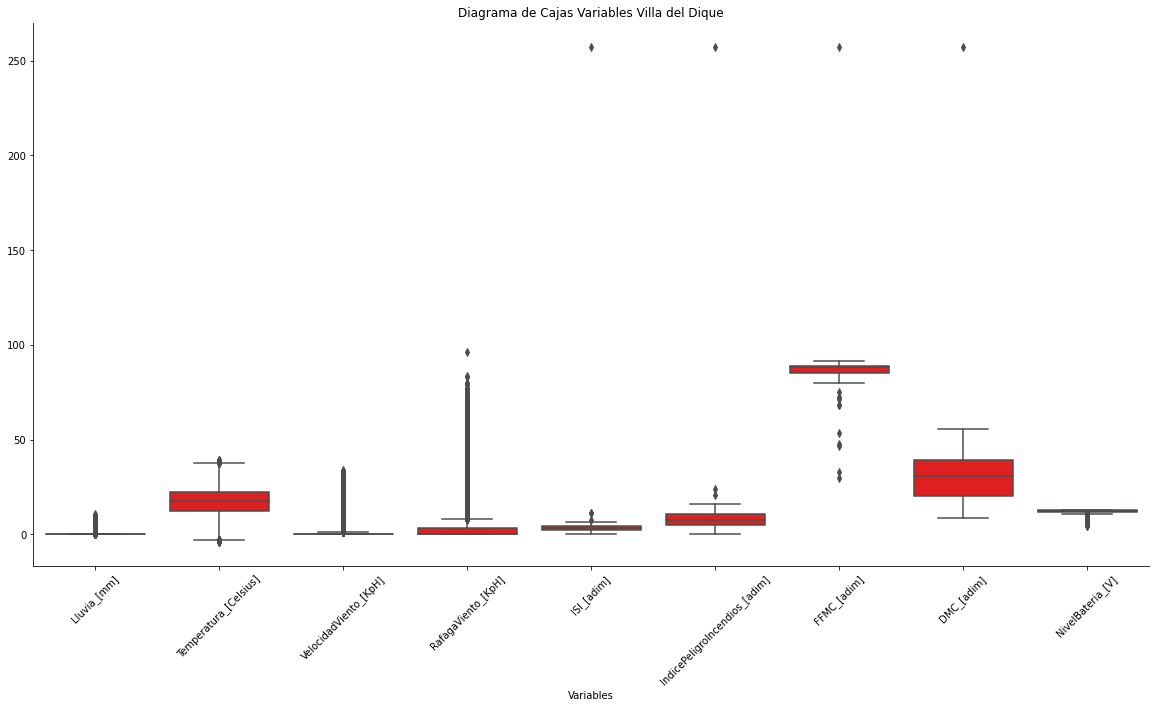

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(data=meteo_VillaDique[['Lluvia_[mm]','Temperatura_[Celsius]','VelocidadViento_[KpH]','RafagaViento_[KpH]','ISI_[adim]','IndicePeligroIncendios_[adim]' 
                                ,'FFMC_[adim]','DMC_[adim]','NivelBateria_[V]']],color='red')
plt.xlabel('Variables')
plt.title('Diagrama de Cajas Variables Villa del Dique')
plt.xticks(rotation=45)
sns.despine()

In [26]:
meteo_VillaDique['ESTACIONES']='Villa del Dique'
meteo_Yacanto['ESTACIONES']='Yacanto'
meteo_StaRosa['ESTACIONES']='Santa Rosa'

box_plot= pd.concat([meteo_VillaDique, meteo_Yacanto,meteo_StaRosa])
#box_plot

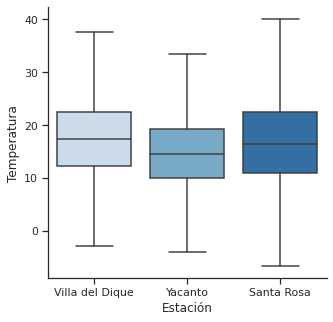

In [27]:
sns.set(font_scale = 1,style="ticks")
plt.figure(figsize=(5,5))
sns.boxplot( y=box_plot['Temperatura_[Celsius]'],x=box_plot['ESTACIONES'],palette="Blues",showfliers = False)
plt.xlabel('Estación')
plt.ylabel('Temperatura')
sns.despine()

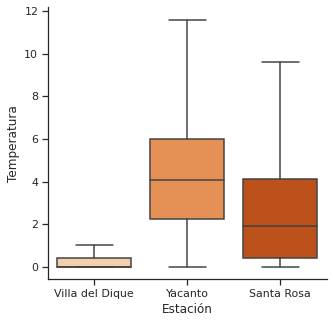

In [28]:
sns.set(font_scale = 1,style="ticks")
plt.figure(figsize=(5,5))
sns.boxplot( y=box_plot['VelocidadViento_[KpH]'],x=box_plot['ESTACIONES'],palette="Oranges",showfliers = False)
plt.xlabel('Estación')
plt.ylabel('Temperatura')
sns.despine()

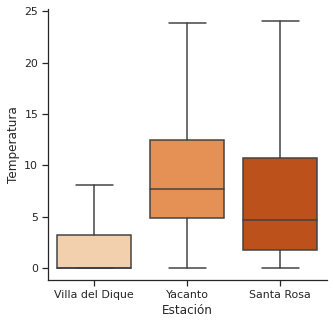

In [29]:
sns.set(font_scale = 1,style="ticks")
plt.figure(figsize=(5,5))
sns.boxplot( y=box_plot['RafagaViento_[KpH]'],x=box_plot['ESTACIONES'],palette="Oranges",showfliers = False)
plt.xlabel('Estación')
plt.ylabel('Temperatura')
sns.despine()

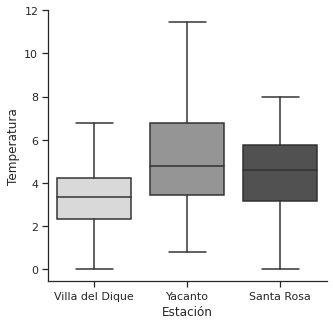

In [30]:
sns.set(font_scale = 1,style="ticks")
plt.figure(figsize=(5,5))
sns.boxplot( y=box_plot['ISI_[adim]'],x=box_plot['ESTACIONES'],palette="Greys",showfliers = False)
plt.xlabel('Estación')
plt.ylabel('Temperatura')
sns.despine()

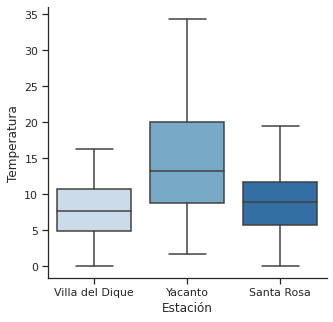

In [31]:
sns.set(font_scale = 1,style="ticks")
plt.figure(figsize=(5,5))
sns.boxplot( y=box_plot['IndicePeligroIncendios_[adim]'],x=box_plot['ESTACIONES'],palette="Blues",showfliers = False)
plt.xlabel('Estación')
plt.ylabel('Temperatura')
sns.despine()

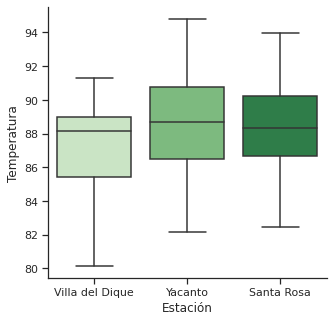

In [32]:
sns.set(font_scale = 1,style="ticks")
plt.figure(figsize=(5,5))
sns.boxplot( y=box_plot['FFMC_[adim]'],x=box_plot['ESTACIONES'],palette="Greens",showfliers = False)
plt.xlabel('Estación')
plt.ylabel('Temperatura')
sns.despine()

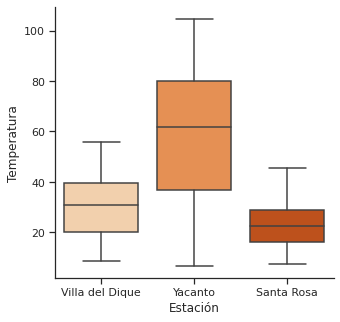

In [33]:
sns.set(font_scale = 1,style="ticks")
plt.figure(figsize=(5,5))
sns.boxplot( y=box_plot['DMC_[adim]'],x=box_plot['ESTACIONES'],palette="Oranges",showfliers = False)
plt.xlabel('Estación')
plt.ylabel('Temperatura')
sns.despine()

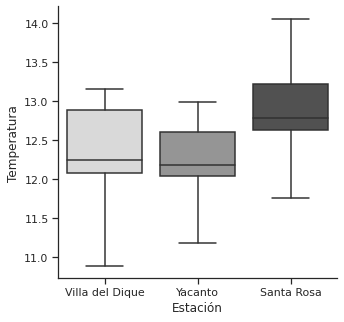

In [34]:
sns.set(font_scale = 1,style="ticks")
plt.figure(figsize=(5,5))
sns.boxplot( y=box_plot['NivelBateria_[V]'],x=box_plot['ESTACIONES'],palette="Greys",showfliers = False)
plt.xlabel('Estación')
plt.ylabel('Temperatura')
sns.despine()

Detección de outliers en estaciones meteorlógicas


In [35]:
def clean_outliers(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_salarios_outlier = (
        np.abs(interesting_col - interesting_col.mean()) <= (2.5 * interesting_col.std()))
    return dataset[mask_salarios_outlier]
    
def n_outliers(df):
  cols = df.columns
  list_of_col = [
      'Temperatura_[Celsius]','VelocidadViento_[KpH]','RafagaViento_[KpH]','ISI_[adim]','IndicePeligroIncendios_[adim]' 
      ,'FFMC_[adim]','DMC_[adim]','NivelBateria_[V]'
  ]
  for column in cols:
    if column in list_of_col:
      result = df.shape[0] - clean_outliers(df,column).shape[0]
      print(str(result)+' outliers for column '+column)
  return None

In [36]:
n_outliers(meteo_StaRosa)

303 outliers for column Temperatura_[Celsius]
1879 outliers for column VelocidadViento_[KpH]
2332 outliers for column RafagaViento_[KpH]
92409 outliers for column ISI_[adim]
92409 outliers for column IndicePeligroIncendios_[adim]
92413 outliers for column FFMC_[adim]
92409 outliers for column DMC_[adim]
395 outliers for column NivelBateria_[V]


In [37]:
n_outliers(meteo_Yacanto)

368 outliers for column Temperatura_[Celsius]
2331 outliers for column VelocidadViento_[KpH]
3082 outliers for column RafagaViento_[KpH]
107732 outliers for column ISI_[adim]
107732 outliers for column IndicePeligroIncendios_[adim]
107732 outliers for column FFMC_[adim]
107732 outliers for column DMC_[adim]
868 outliers for column NivelBateria_[V]


In [38]:
n_outliers(meteo_VillaDique)

428 outliers for column Temperatura_[Celsius]
4579 outliers for column VelocidadViento_[KpH]
4428 outliers for column RafagaViento_[KpH]
100486 outliers for column ISI_[adim]
100486 outliers for column IndicePeligroIncendios_[adim]
100486 outliers for column FFMC_[adim]
100486 outliers for column DMC_[adim]
549 outliers for column NivelBateria_[V]


Para detectar observaciones outliers, lo que hicimos fue verificar, para cada estación hidrometeoroligca, qué variables se apartaban de la media en más de 2.5 desviaciones estándar.
Los valores observados no parecen ser producto de errores de carga o de estimación.
Por otra parte, eliminar un punto o una serie de puntos del dataset porque es outlier puede ser cuestionable ya que podria tratasre de un evento extremo (que deseamos predecir).



## Agregación de datos




 



Acumulación anual de los datos de lluvia (Precipitación Total Anual (PTA)) en "BDHI_LaFlorida



In [39]:
def monthdelta(date, delta):
    m, y = (date.month+delta) % 12, date.year + ((date.month)+delta-1) // 12
    if not m: m = 12
    d = min(date.day, [31,
        29 if y%4==0 and not y%400==0 else 28,31,30,31,30,31,31,30,31,30,31][m-1])
    new_date = (date.replace(day=d,month=m, year=y))
    return new_date.strftime('%Y-%m-%d')

In [40]:
meteo_LaFlorida.columns = ['fechas','lluvias']
meteo_LaFlorida['fechas'].apply(lambda x: monthdelta(x,6))
df = meteo_LaFlorida.groupby(meteo_LaFlorida.fechas.dt.year).sum()

No handles with labels found to put in legend.


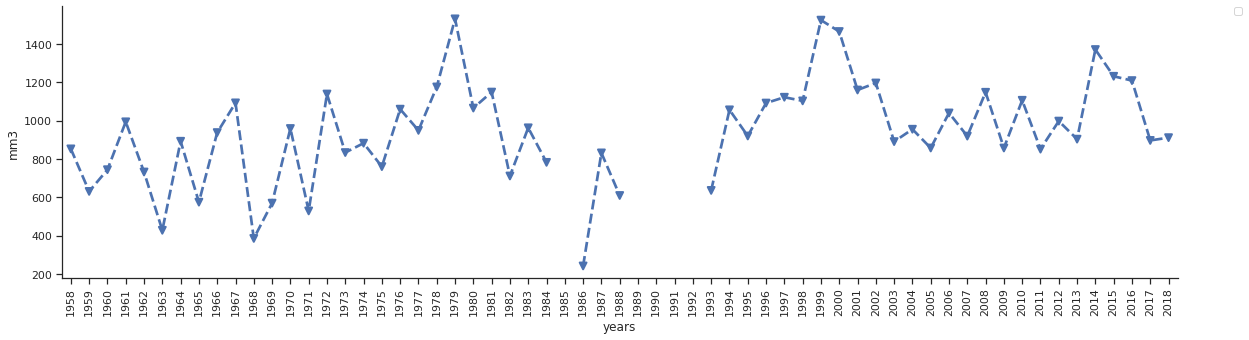

In [41]:
plt.figure(figsize=(20,5))
sns.pointplot(x=meteo_LaFlorida.fechas.dt.year,y=meteo_LaFlorida.lluvias,
              estimator=sum,
            dodge=True, ci=None,
              markers='v', linestyles='--', errwidth=1, capsize=0.2)
plt.xlabel('years')
plt.ylabel('mm3')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

Precipitación máxima diaria anual (PMDA) en "BDHI_LaFlorida"

No handles with labels found to put in legend.


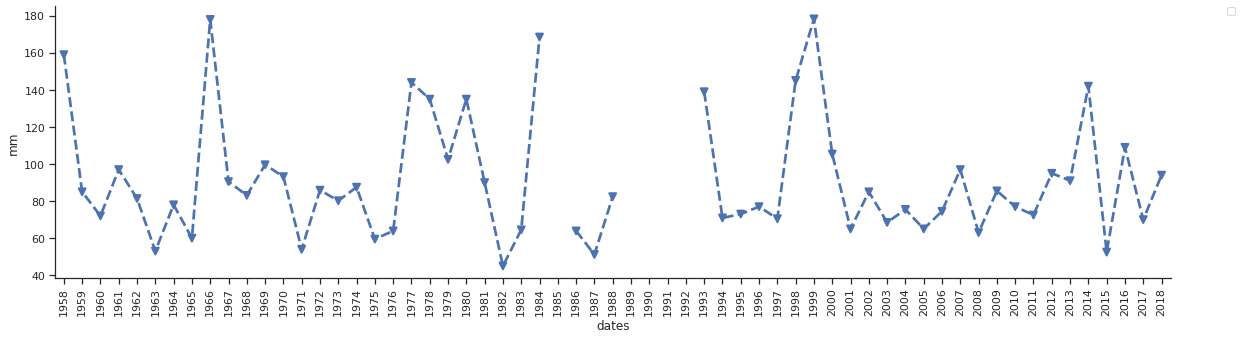

In [42]:
plt.figure(figsize=(20,5))
sns.pointplot(x=meteo_LaFlorida.fechas.dt.year,y=meteo_LaFlorida.lluvias,
              estimator=max,
              dodge=True, ci=None,
              markers='v', linestyles='--', errwidth=1, capsize=0.2)
plt.xlabel('dates')
plt.ylabel('mm')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()


In [43]:
df = meteo_LaFlorida.groupby(meteo_LaFlorida.fechas.dt.month).sum()
df

,lluvias
fechas,
1,9312.5
2,7770.1
3,7805.7
4,3892.7
5,1168.3
6,590.6
7,465.5
8,637.7
9,1813.3


Acumulación anual de los datos de *caudal* en "Caudal_Embalse"

In [44]:
df= caudal_embalse.groupby(caudal_embalse.fecha.dt.year)
df.sum()


,Caudal_m3/s
fecha,
1914,262.00
1915,404.90
1916,72.10
1917,138.60
1918,408.80
...,...
2014,590.28
2015,484.04
2016,258.09


No handles with labels found to put in legend.


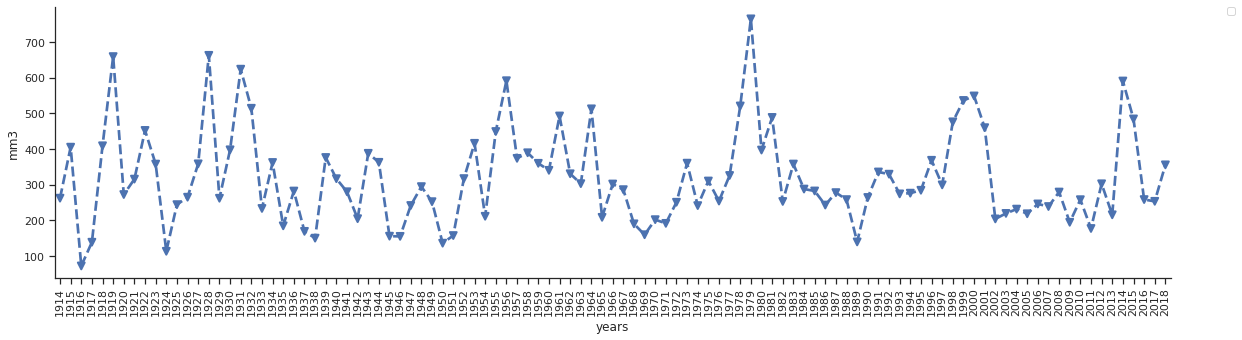

In [46]:
plt.figure(figsize=(20,5))
sns.pointplot(x=caudal_embalse.fecha.dt.year,y=caudal_embalse['Caudal_m3/s'],
              estimator=sum,
            dodge=True, ci=None,
              markers='v', linestyles='--', errwidth=1, capsize=0.2)
plt.xlabel('years')
plt.ylabel('mm3')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

Analizando los graficos de las series temporales de la Precipitacion Total Anual (PTA), la Precipitacion Maxima Diaria Anual (PMDA) en BDHI_LAFLorida y la PTA del Caudal Embalse. No se observa que las mismas sean estacionarias. 

Analisis de correlación entre lluvia y caudal




No handles with labels found to put in legend.


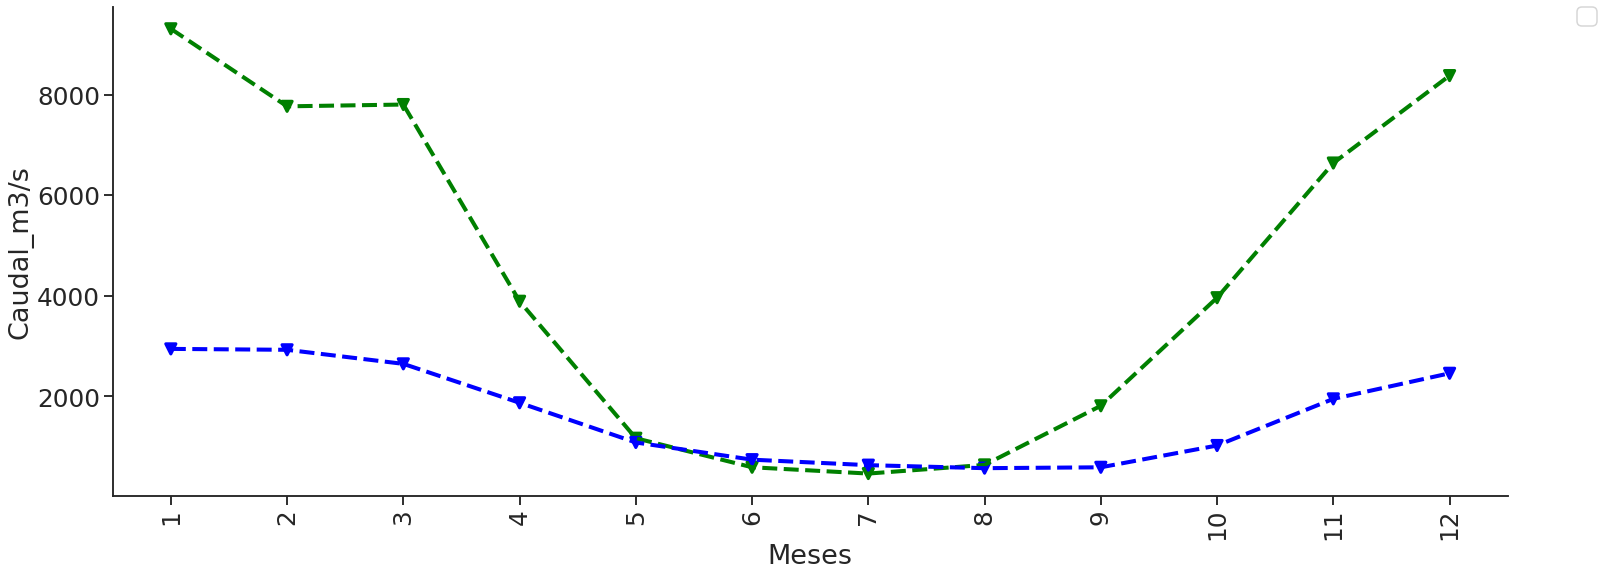

In [ ]:
sns.set_context(context='talk', font_scale=1.5)
data_embalse = caudal_embalse[caudal_embalse['fecha'] >= '1958-01-01']

plt.figure(figsize=(25,9))
sns.pointplot(x=meteo_LaFlorida.fechas.dt.month,y=meteo_LaFlorida.lluvias,
              estimator=sum,
            dodge=True, ci=None,
              markers='v', linestyles='--', errwidth=1, capsize=0.2,color='Green',label='Lluvias (mm)')
#plt.xlabel('years')
#plt.ylabel('mm3')
plt.xticks(rotation=90)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#sns.despine()

sns.pointplot(x=data_embalse.fecha.dt.month,y=data_embalse['Caudal_m3/s'],
              estimator=sum,
            dodge=True, ci=None,
              markers='v', linestyles='--', errwidth=1, capsize=0.2, color='blue',label='Caudal(m3/s)- Lluvia(mm) ')
plt.xlabel('Meses')
#plt.ylabel('mm3')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()


Deberiamos analizar la correlacion entre estas variables con algo mas que no sea solo grafico? Explciar un poco

Analisis de correlación entre lluvia y las demas variables meteorologicas en las estaciones "APRHi - Sta Rosa de Calamuchita", "APRHi - Yacanto Norte" y "AgriculturaCba - Villa del Dique"

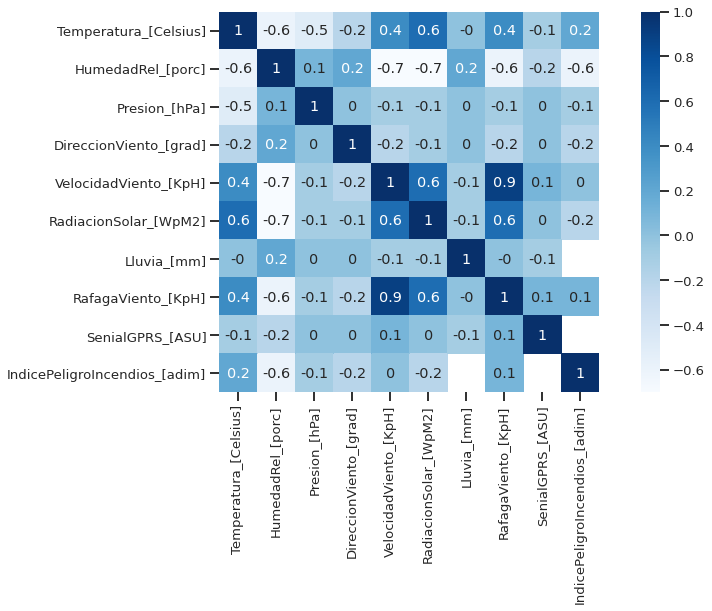

In [ ]:
sns.set_context(context='talk', font_scale=0.8)
df =meteo_StaRosa.loc[:, ['Temperatura_[Celsius]',	'HumedadRel_[porc]',	'Presion_[hPa]',	'DireccionViento_[grad]',	'VelocidadViento_[KpH]',	'RadiacionSolar_[WpM2]',	'Lluvia_[mm]',	'RafagaViento_[KpH]',	'SenialGPRS_[ASU]',	'IndicePeligroIncendios_[adim]']]


plt.figure(figsize=(15,7))
sns.heatmap(df.corr(method='spearman').round(1), square = True, annot =True,cmap="Blues" )



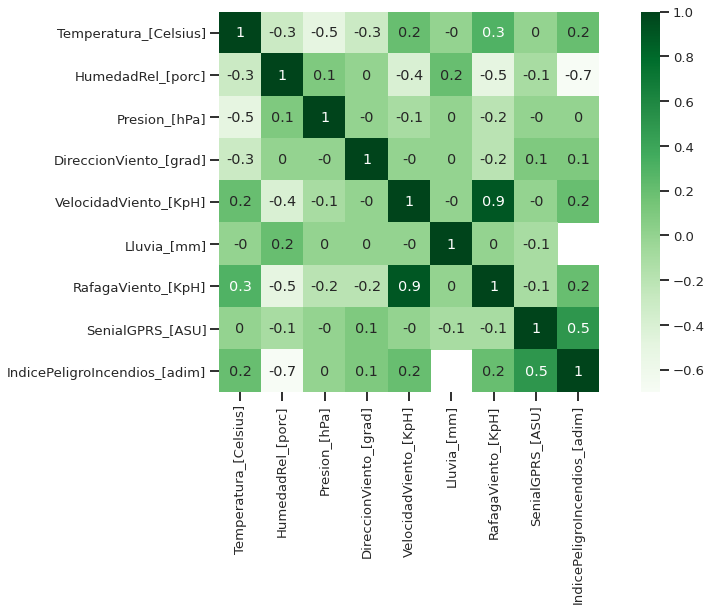

In [ ]:
sns.set_context(context='talk', font_scale=0.8)
df =meteo_Yacanto.loc[:, ['Temperatura_[Celsius]',	'HumedadRel_[porc]',	'Presion_[hPa]',	'DireccionViento_[grad]',	'VelocidadViento_[KpH]',	'Lluvia_[mm]',	'RafagaViento_[KpH]',	'SenialGPRS_[ASU]',	'IndicePeligroIncendios_[adim]']]

plt.figure(figsize=(15,7))
sns.heatmap(df.corr(method='spearman').round(1), square = True, annot =True,cmap="Greens" )

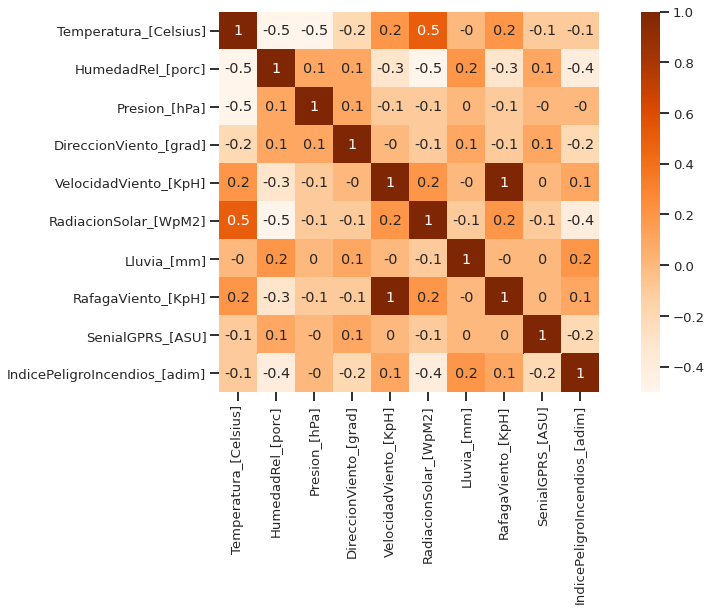

In [ ]:
sns.set_context(context='talk', font_scale=0.8)
df =meteo_VillaDique.loc[:, ['Temperatura_[Celsius]',	'HumedadRel_[porc]',	'Presion_[hPa]',	'DireccionViento_[grad]',	'VelocidadViento_[KpH]',	'RadiacionSolar_[WpM2]',	'Lluvia_[mm]',	'RafagaViento_[KpH]',	'SenialGPRS_[ASU]',	'IndicePeligroIncendios_[adim]']]

plt.figure(figsize=(15,7))
sns.heatmap(df.corr(method='spearman').round(1), square = True, annot =True,cmap="Oranges" )

Estos heatmaps se pueden interpretar como probabilidades conjuntas. Por ejemplo, si observamos el primer gráfico tenemos que la probabilidad de que la variable Lluvia correlacionada con Presion es de 0,015. Esa misma idea se puede repetir cruzando todas las categorías de todas las variables.
En este caso solo nos intersa Lluvia vs otras variables.

Ahora bien, en los tres gráficos resalta que las probabilidades más altas están cuando se cruzan las categorías "Lluvia" con "Humedad Relativa" y "temperatura". 
Esto nos lleva a pensar que existe una cierta correlación entre estas variables. 

Prueba de normalidad para las series de lluvia de las estaciones meteorologicas

In [ ]:

# Test Normalidad Yacanto
yacanto = meteo_Yacanto[['Lluvia_[mm]']].resample('1D').sum()
z1,p1 = scipy.stats.normaltest(yacanto, nan_policy='omit')
print('El test de normalidad para las lluvas en Yacanto es negativo, ya que su pValue es de {}'.format(p1))

El test de normalidad para las lluvas en Yacanto es negativo, ya que su pValue es de [5.84443644e-174]


In [ ]:
# Prueba de normalidad para villa del dique
vdd = meteo_VillaDique['Lluvia_[mm]'].resample('1D').sum()
z2,p2 = scipy.stats.normaltest(vdd, nan_policy='omit')
print('El test de normalidad para las lluvas en Villa Del Dique es negativo, ya que su pValue es de {}'.format(p2))

El test de normalidad para las lluvas en Villa Del Dique es negativo, ya que su pValue es de 3.1376036702818986e-184


In [ ]:
meteo_StaRosa.index

Index(['08/15/2018 13:00', '08/15/2018 13:20', '08/15/2018 13:30',
       '08/15/2018 13:40', '08/15/2018 13:50', '08/15/2018 14:00',
       '08/15/2018 14:10', '08/15/2018 14:20', '08/15/2018 14:30',
       '08/15/2018 14:40',
       ...
       '05/18/2020 16:30', '05/18/2020 16:40', '05/18/2020 16:50',
       '05/18/2020 17:00', '05/18/2020 17:10', '05/18/2020 17:20',
       '05/18/2020 17:30', '05/18/2020 17:40', '05/18/2020 17:50',
       '05/18/2020 18:00'],
      dtype='object', name='date_time', length=92471)

In [ ]:
meteo_StaRosa.index = pd.to_datetime(meteo_StaRosa.index, errors='coerce')

In [ ]:
# Prueba de normalidad para Sta Rosa
# meteo_StaRosa = meteo_StaRosa.set_index('date')
sta_rosa = meteo_StaRosa['Lluvia_[mm]'].resample('1D').sum()
z3,p3 = scipy.stats.normaltest(sta_rosa, nan_policy='omit')
print('pValues indicating normality: {}'.format(p3))

#meteo_StaRosa

pValues indicating normality: 1.201844524292779e-205


##  Análisis y curación de datos de una API - formato JSON

Referencias: https://darksky.net/dev/docs


Extraemos los datos para la localidad Santa Rosa de Calamuchita para el periodo 1/mayo/2018 al 1/mayo/2020. 
Generamos un nuevo dataset a partir de los datos (time, summary, precipAccumulation, temperature, humidity, pressure, windSpeed, uvIndex, temperatureMin, temperatureMax.
Convertimos las unidades necesarias a estos datos para poder compararlos con "APRHi - Sta Rosa de Calamuchita".
Comparación de los estadísticos de estos datasets con los de "APRHi - Sta Rosa de Calamuchita"

In [ ]:
import datetime
import requests
import pandas as pd
import json
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# This function returns a list of date between to boundaries. Source: https://stackoverflow.com/questions/1060279/iterating-through-a-range-of-dates-in-python
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + datetime.timedelta(n)

In [ ]:
baseUrl = "https://api.darksky.net/forecast/<key>/<longitude>,<latitude>,<date>?exclude=flags,hourly&units=ca"

In [ ]:
"""
En este bloque se descarga la data y se la escribe en un archivo.
OJO! Cada vez que se ejecuta la funcion se sobre escribe el archivo con la data scrapeada.
"""

start_date = datetime.datetime(2018, 5, 1)
end_date = datetime.datetime(2020, 5, 1)

data = []
for date in daterange(start_date, end_date):
    tmstmp = str(int(date.timestamp()))
    replacedUrl = baseUrl.replace("<key>", "9349598e9f11f5eddceb6791daa6d787").replace("<longitude>", "-64.533333").replace("<latitude>", "-32.066667").replace("<date>",tmstmp)
    r = requests.get(url = replacedUrl)
    # json with day data
    partial_data = r.json()
    data.append(partial_data)
# writing json
with open('sta_rosa_scraped.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)

In [ ]:
with open("/content/drive/My Drive/DiploDatos 2020/sta_rosa_scraped.json") as f:
    data = json.load(f)

FileNotFoundError: ignored

In [ ]:
flatten_json = pd.json_normalize(data) # esta linea en teoria devuelve el json desanidado
flatten_json # pero como se ve toda la data anidada en la llave daily queda comprimida en daily.data.

NameError: ignored

In [ ]:
# identificar a partir de que fecha hay informacion, y luego descartar la informacion vacia

for n,dat in enumerate(data):
    try:
        if data[n]['daily']:
            print(n)
        break
    except KeyError:
        continue

NameError: ignored

In [ ]:
cleaned_json = data[236::]
flatten_json = pd.json_normalize(cleaned_json, ['daily', 'data'])
flatten_json.columns

NameError: ignored

In [ ]:
df = flatten_json[['time',
                   'summary',
                   'precipAccumulation',
                   'humidity',
                   'pressure',
                   'windSpeed',
                   'uvIndex',
                   'temperatureMax']]

NameError: ignored

In [ ]:
df['time'] = df['time'].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [ ]:
df['humidity'] = df['humidity'].apply(lambda x: x * 100)

In [ ]:
df.set_index('time').head()

In [ ]:
df.to_csv('scrapped_sta_rosa_dark_sky.csv',index=False)

NameError: ignored

In [ ]:
sta_rosa_dark_sky = pd.read_csv('scrapped_sta_rosa_dark_sky.csv', parse_dates=True, index_col='time')

In [ ]:
sta_rosa_dark_sky.head()

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=sta_rosa_dark_sky[['precipAccumulation',
                                    'temperatureMax',
                                    'humidity',
                                    'windSpeed']],color='red')
plt.xlabel('Variables')
plt.title('Diagrama de Cajas Variables Sta Rosa - Dark Sky')
plt.xticks(rotation=45)
sns.despine()

In [ ]:
aprhi = pd.read_csv("/content/drive/My Drive/DiploDatos 2020/APRHi - Sta Rosa de Calamuchita.csv", parse_dates=True, index_col='date_time')

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=aprhi[['Lluvia_[mm]',
                        'Temperatura_[Celsius]',
                        'HumedadRel_[porc]',
                        'RafagaViento_[KpH]']],color='green')
plt.xlabel('Variables')
plt.title('Diagrama de Cajas Variables Santa Rosa de Calamuchita')
plt.xticks(rotation=45)
sns.despine()

NameError: ignored

<Figure size 1440x720 with 0 Axes>

In [ ]:
aprhi.info()

In [ ]:
aprhi2 = pd.read_csv("/content/drive/My Drive/DiploDatos 2020/APRHi - Sta Rosa de Calamuchita.csv", parse_dates=['date_time','date'])
aprhi2['date_time'] = pd.to_datetime(aprhi2['date_time'],errors='coerce')
aprhi3 = aprhi2.copy()
aprhi2 = aprhi2.groupby(aprhi2['date_time'].dt.day,as_index=False).mean()
aprhi_acc = aprhi3.groupby(aprhi3['date_time'].dt.day,as_index=False).sum()
aprhi2['Lluvia_[mm]'] = aprhi_acc['Lluvia_[mm]']

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=aprhi2[['Lluvia_[mm]',
                        'Temperatura_[Celsius]',
                        'HumedadRel_[porc]',
                        'RafagaViento_[KpH]']],color='lightgreen')
plt.xlabel('Variables')
plt.title('Diagrama de Cajas Variables Santa Rosa de Calamuchita')
plt.xticks(rotation=45)
sns.despine()

NameError: ignored

<Figure size 1440x720 with 0 Axes>

In [ ]:
sta_rosa_dark_sky.describe()

In [ ]:
aprhi2.describe().drop(['dia','Codigo','BUI_[adim]','DireccionViento_[grad]'],axis=1)

## Análisis y curación de datos de un Excel y un TXT

Referencias GLDAS: https://ldas.gsfc.nasa.gov/gldas
Referencias IMERG: https://disasters.nasa.gov/instruments/imerg

 Leemos los datos de GLDAS_SantaRosa.xlsx para el período 1/Mayo/2018 al 31/Abril/2020.
 Leemos los datos de IMERG_SantaRosa.txt para el período 1/Mayo/2018 al 31/Abril/2020.
Convertimos las unidades necesarias a GLDAS para poder compararlos con "APRHi - Sta Rosa de Calamuchita".
Comparamos los estadísticos de estos datasets con los de "APRHi - Sta Rosa de Calamuchita".

In [ ]:
gldas_sta_rosa = pd.read_excel("/content/drive/My Drive/DiploDatos 2020/GLDAS_SantaRosa.xlsx",
                               parse_dates=True,
                               index_col='Date')
gldas_sta_rosa.head()   

In [ ]:
imerg_santa_rosa = pd.read_csv('/content/drive/My Drive/DiploDatos 2020/IMERG_SantaRosa.txt',sep='\t',parse_dates=True,index_col='Date')
# imerg_santa_rosa.index = imerg_santa_rosa.index.date
imerg_santa_rosa.head()

In [ ]:
gldas_sta_rosa['WND_mps'] = gldas_sta_rosa['WND_mps'].apply(lambda x: x * 3600 / 1000)

NameError: ignored

In [ ]:
gldas_sta_rosa = gldas_sta_rosa.rename(columns={
    'Precip_mm': 'Lluvia_[mm]',
    'TMP_Aire_Cels': 'Temperatura_[Celsius]',
    'WND_mps': 'VelocidadViento_[KpH]',
})

In [ ]:
gldas_sta_rosa['Lluvia_[mm]'].plot()
plt.xticks(rotation=45)

NameError: ignored

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=imerg_santa_rosa[['Precip_mm']],color='pink')
plt.xlabel('Variables')
plt.title('Diagrama de Cajas Variables IMERG - Santa Rosa de Calamuchita')
plt.xticks(rotation=45)
sns.despine()

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=gldas_sta_rosa[['Lluvia_[mm]',
                                 'Temperatura_[Celsius]',
                                 'HMD_perc',
                                 'VelocidadViento_[KpH]']],color='yellow')
plt.xlabel('Variables')
plt.title('Diagrama de Cajas Variables Santa Rosa de Calamuchita')
plt.xticks(rotation=45)
sns.despine()

NameError: ignored

<Figure size 1440x720 with 0 Axes>


##Rellenar datos faltantes
De todos los datasets comparados, para cada variable  se parece más a los de "APRHi - Sta Rosa de Calamuchita":

- Para **lluvias** el dataset mas parecido es el que corresponde al dataframe de **imberg**.
- Para la **Temperatura** el dataset mas parecido es el de **GLDAS**
- Para la **Humedad** el dataset mas parecido es el de **wunderground**.
- Para la **velocidad del viento** el dataset mas parecido es el de **GLDAS** (aunque el de wunderground podria ser util tmb)

In [ ]:
sta_rosa_dark_sky.describe()

NameError: ignored

In [ ]:
df_wu = pd.read_csv("/content/drive/My Drive/DiploDatos 2020/scrapped_icalamuc3", parse_dates=True, index_col='Time')
df_wu.describe()

FileNotFoundError: ignored

In [ ]:
imerg_santa_rosa.describe()

NameError: ignored

In [ ]:
gldas_sta_rosa.describe()

Acumulamos las lluvias y promediamos las demás variables de "APRHi - Sta Rosa de Calamuchita" cada 30 minutos.

In [ ]:
aprhi30 = pd.read_csv('/content/drive/My Drive/DiploDatos 2020/APRHi - Sta Rosa de Calamuchita.csv', parse_dates=['date_time','date'])
aprhi30['date_time'] = pd.to_datetime(aprhi30['date_time'],errors='coerce')
aprhi30_2 = aprhi30.copy()
aprhi30 = aprhi30.groupby(aprhi30['date_time'].dt.floor('30min')).mean()
aprhi30_2 = aprhi30_2.groupby(aprhi30_2['date_time'].dt.floor('30min')).sum()
aprhi30['Lluvia_[mm]'] = aprhi30_2['Lluvia_[mm]']

FileNotFoundError: ignored

Interpolamos los datos ya procesados de las mejores fuentes de información "alternativas" (salvo las lluvias), cada 30 minutos.

In [ ]:
gldas_sta_rosa = gldas_sta_rosa[['Temperatura_[Celsius]','VelocidadViento_[KpH]']]

NameError: ignored

In [ ]:
gldas_resampled = gldas_sta_rosa.resample('30min').asfreq()
gldas_resampled.head()

NameError: ignored

In [ ]:
df_wu = df_wu[['Humidity[%]']].resample('30min').mean()
df_wu

In [ ]:
imerg_santa_rosa.tail()

Interpolamos el dataset "APRHi - Sta Rosa de Calamuchita" para rellenar los huecos.

In [ ]:
aprhi

NameError: ignored

In [ ]:
final_df = aprhi30.merge(
    imerg_santa_rosa, left_index=True, right_index=True
).merge(
    df_wu, left_index=True, right_index=True
).merge(
    gldas_resampled, left_index=True, right_index=True
)

NameError: ignored

In [ ]:
final_df['Temperatura_[Celsius]_x'].fillna(final_df['Temperatura_[Celsius]_y'], inplace=True)

In [ ]:
final_df.columns

NameError: ignored

In [ ]:
final_df['Lluvia_[mm]'].fillna(final_df['Precip_mm'], inplace=True)
final_df['Temperatura_[Celsius]_x'].fillna(final_df['Temperatura_[Celsius]_y'], inplace=True)
final_df['HumedadRel_[porc]'].fillna(final_df['Humidity[%]'], inplace=True)
final_df['VelocidadViento_[KpH]_x'].fillna(final_df['VelocidadViento_[KpH]_y'], inplace=True)

In [ ]:
final_df.info()

NameError: ignored

In [ ]:
final_df.drop(['BUI_[adim]',
               'Precip_mm',
               'Temperatura_[Celsius]_y',
               'Humidity[%]',
               'VelocidadViento_[KpH]_y',
               'ISI_[adim]',
               'FaseLunarAmanecerOcaso_[adim]',
               'Alertas_Heladas_Agroapp_[adim]',
               'Panel_Solar_[adim]',
               'IndicePeligroIncendios_[adim]',
               'FFMC_[adim]',
               'DMC_[adim]',
               'DC_[adim]',
              ],axis=1, inplace=True)

Exportamos los datasets nuevos en formato csv.

In [ ]:
final_df.info()

NameError: ignored

In [ ]:
final_df.head()

NameError: ignored

In [ ]:
final_df.to_csv('santa_rosa_meteo.csv')

In [ ]:
import pandas as pd
a = pd.read_csv('santa_rosa_meteo.csv', parse_dates=True, index_col=0)

FileNotFoundError: ignored

In [ ]:
a.head()

## Análisis y curación de datos Scrapeados de WeatherUnderground

Referencias: https://www.wunderground.com/

Extraemos los datos  para la estación meteorológica personal (PWS, por siglas en inglés) "ICALAMUC5" (en Villa General Belgrano), para el período 1/Mayo/2018 al 01/Mayo/2020 mediante el Scrappeo de WeatherUnderground (WU). 
Generamos un nuevo dataset a partir de los datos (time, summary, precipAccumulation, temperature, humidity, pressure, windSpeed, uvIndex, temperatureMin, temperatureMax.
Convertimos las unidades necesarias a estos datos para poder compararlos con "APRHi - Sta Rosa de Calamuchita".
Comparación de los estadísticos de estos datasets con los de "APRHi - Sta Rosa de Calamuchita"



In [ ]:
#!pip3 install requests bs4

In [ ]:
from bs4 import BeautifulSoup as bs
import requests
from urllib.request import urlopen
import datetime
import pandas as pd

In [ ]:
stations = ["ICALAMUC3"]
start_date = datetime.date(2018, 5, 1)
end_date = datetime.date(2020, 5, 6) #Esta fecha no es incluida
rango = 'daily'
baseUrl = 'https://www.wunderground.com/dashboard/pws/<station>/table/<date>/<date>/daily'

In [ ]:
# stations_temp = []

for station in stations:
    print(station)
    tab_exist = 0
    for date in daterange(start_date, end_date):
        url = baseUrl.replace("<date>", date.strftime("%Y-%m-%d")).replace("<station>", station)
        page = bs(requests.get(url).content)
        response = requests.get(url)
        tabla = page.find('table', attrs={'class':'history-table desktop-table'})
        if tab_exist == 0:
            if tabla:
                print('Hay datos', date, station)
                tab_exist = 1
                #Creo lista con el nombre de las columnas
                list_html = tabla.find_all('th')
                #lista con las unidades
                list_unid = ['','C','C','%','','km/h','km/h','hPa','mm','mm','','']
                list_col = []
                for i in list_html:
                    col_temp = i.string
                    list_col.append(col_temp)
                for j in range(len(list_col)):
                    if list_unid[j]:          
                        list_col[j] = list_col[j] + '[' + list_unid[j] + ']'
                        #list_col[j] = list_col[j].strip('()'
                df_wu = pd.DataFrame(columns = list_col)
                tab_exist=1
        if tab_exist == 1:    #Entra acá cuando ya se creo la lista con los parametros
            print(date)
            if response.status_code == 200:
                if tabla:
                    m = tabla.tbody.find_all('tr')
                    m_val = []
                    for i in m:
                        list_temp = []
                        l_html = i.find_all('td')
                        for j in range(0,len(l_html)): 
                            if j == 0:
                                list_temp.append(date.strftime("%Y-%m-%d") +' '+ l_html[j].string)
                            elif j == 4 or j == 10 or j == 11: 
                                list_temp.append(l_html[j].string) 
                            else:
                                list_temp.append(l_html[j].span.span.string)
                        m_val.append(list_temp) # Matriz con los valores
                    df_temp = pd.DataFrame(m_val, columns=list_col)  # Transformo la matriz en un DataFrame
                    df_temp['Station'] = station
                    df_temp['Date'] = date
                    df_wu = pd.concat([df_wu,df_temp], axis=0)
            else:
                print(response)

ICALAMUC3
Hay datos 2018-05-01 ICALAMUC3
2018-05-01
2018-05-02
2018-05-03
2018-05-04
2018-05-05
2018-05-06
2018-05-07
2018-05-08
2018-05-09
2018-05-10
2018-05-11
2018-05-12
2018-05-13
2018-05-14
2018-05-15
2018-05-16
2018-05-17
2018-05-18
2018-05-19
2018-05-20
2018-05-21
2018-05-22
2018-05-23
2018-05-24
2018-05-25
2018-05-26
2018-05-27
2018-05-28
2018-05-29
2018-05-30
2018-05-31
2018-06-01
2018-06-02
2018-06-03
2018-06-04
2018-06-05
2018-06-06
2018-06-07
2018-06-08
2018-06-09
2018-06-10
2018-06-11
2018-06-12
2018-06-13
2018-06-14
2018-06-15
2018-06-16
2018-06-17
2018-06-18
2018-06-19
2018-06-20
2018-06-21
2018-06-22
2018-06-23
2018-06-24
2018-06-25
2018-06-26
2018-06-27
2018-06-28
2018-06-29
2018-06-30
2018-07-01
2018-07-02
2018-07-03
2018-07-04
2018-07-05
2018-07-06
2018-07-07
2018-07-08
2018-07-09
2018-07-10
2018-07-11
2018-07-12
2018-07-13
2018-07-14
2018-07-15
2018-07-16
2018-07-17
2018-07-18
2018-07-19
2018-07-20
2018-07-21
2018-07-22
2018-07-23
2018-07-24
2018-07-25
2018-07-26
20

In [ ]:
df_wu.to_csv('scrapped_icalamuc3',index=False)
df_wu

In [ ]:
df_wu = pd.read_csv('scrapped_icalamuc3', parse_dates=True, index_col='Time')

In [ ]:
df_wu

In [ ]:
df_wu.isna().sum()

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_wu[['Precip. Accum.[mm]',
                        'Temperature[C]',
                        'Humidity[%]',
                        'Speed[km/h]']],color='blue')
plt.xlabel('Variables')
plt.title('Diagrama de Cajas Variables Icalacum3')
plt.xticks(rotation=45)
sns.despine()

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=aprhi[['Lluvia_[mm]',
                        'Temperatura_[Celsius]',
                        'HumedadRel_[porc]',
                        'RafagaViento_[KpH]']],color='green')
plt.xlabel('Variables')
plt.title('Diagrama de Cajas Variables Santa Rosa de Calamuchita')
plt.xticks(rotation=45)
sns.despine()